# Least Square data fitting

In [1]:
using LinearAlgebra
using VMLS

In [4]:
# Petroleum consumption z in thousand barrels/day

z = petroleum_consumption_data()

34-element Vector{Int64}:
 63122
 60953
 59551
 58785
 59795
 60083
 61819
 63107
 64978
 66090
     ⋮
 84558
 85566
 86724
 86046
 84972
 88157
 89105
 90340
 91195

In [6]:
N = length(z)
A = [ones(N) 1:N]

34×2 Matrix{Float64}:
 1.0   1.0
 1.0   2.0
 1.0   3.0
 1.0   4.0
 1.0   5.0
 1.0   6.0
 1.0   7.0
 1.0   8.0
 1.0   9.0
 1.0  10.0
 ⋮    
 1.0  26.0
 1.0  27.0
 1.0  28.0
 1.0  29.0
 1.0  30.0
 1.0  31.0
 1.0  32.0
 1.0  33.0
 1.0  34.0

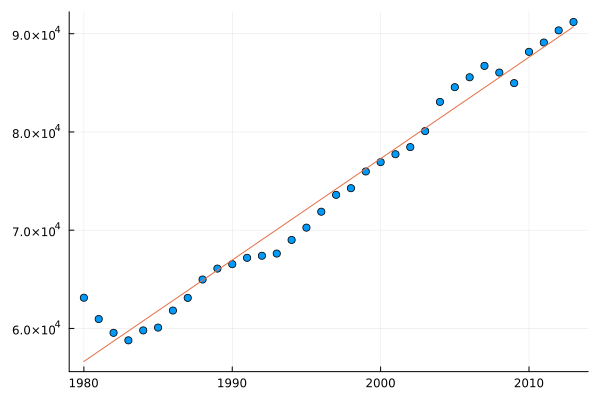

In [7]:
using Plots 
theta = A \ z
scatter(1980:2013, z, legend=false)
plot!(1980:2013, A*theta)

# Estimation of trend and seasonal component

In [8]:
using VMLS
vmt = vehicle_miles_data()
N = size(vmt)[1]*size(vmt)[2]
y = reshape(vmt', N, 1)
A = [1:N vcat([eye(12) for i=1:15]...)]
xhat = A\y

13×1 Matrix{Float64}:
     96.87867063492094
 214671.57966269835
 205011.16765873015
 239414.22232142847
 238755.47698412693
 249336.59831349205
 248294.3196428571
 253101.1076388889
 253547.49563492066
 231032.61696428567
 244304.8716269841
 228650.12628968252
 230816.04761904755

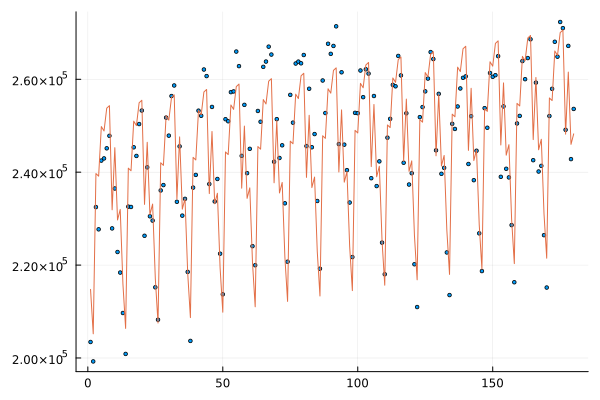

In [13]:
using Plots 
scatter(1:N, y, markersize=2, legend=false)
yhat = A*xhat
plot!(1:N, yhat)

# Polynomial fit

Generate a training set of 100 points and plot them

In [20]:
N = 100
x = -1 .+ 2*rand(N, 1)

100×1 Matrix{Float64}:
 -0.9245477546110927
  0.42380651065441555
 -0.30680919830456754
 -0.2578201644402034
 -0.8337837663739915
  0.9566223028307792
 -0.6060446111016957
 -0.2870511863054437
 -0.2176253045265899
 -0.751445040306552
  ⋮
  0.8434121841707451
 -0.765707622196431
  0.24839346393729334
 -0.7909989502652257
 -0.8758801156845695
  0.9385099304845572
 -0.8009682815689525
  0.3128137232879693
 -0.0856525048473249

In [21]:
y = x.^3 - x + 0.4 ./ (1 .+ 25*x.^2) + 0.10*randn(N, 1)

100×1 Matrix{Float64}:
  0.12440128027001533
 -0.17343529940656305
  0.3398844974235732
  0.33034890193386723
  0.30852546871461217
  0.004580616956200545
  0.40276372677280214
  0.2973454323427167
  0.4387504321263829
  0.3988672125862708
  ⋮
 -0.26198826808655
  0.22464018253108692
 -0.12246629100030157
  0.3976058957852492
  0.33736557191975974
 -0.10959263323488888
  0.2614094455772389
 -0.2685712562840778
  0.4381127655185314

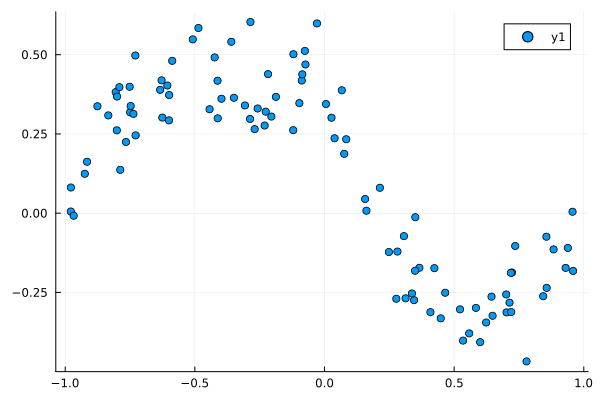

In [32]:
using Plots
scatter(x, y)

In [33]:
p = 3
A = vandermonde(x, p)

100×3 Matrix{Float64}:
 1.0  -0.924548   0.854789
 1.0   0.423807   0.179612
 1.0  -0.306809   0.0941319
 1.0  -0.25782    0.0664712
 1.0  -0.833784   0.695195
 1.0   0.956622   0.915126
 1.0  -0.606045   0.36729
 1.0  -0.287051   0.0823984
 1.0  -0.217625   0.0473608
 1.0  -0.751445   0.56467
 ⋮                
 1.0   0.843412   0.711344
 1.0  -0.765708   0.586308
 1.0   0.248393   0.0616993
 1.0  -0.790999   0.625679
 1.0  -0.87588    0.767166
 1.0   0.93851    0.880801
 1.0  -0.800968   0.64155
 1.0   0.312814   0.0978524
 1.0  -0.0856525  0.00733635

In [34]:
function polyfit(x, y, p) 
    A = vandermonde(x, p)
    return A \ y 
end

polyfit (generic function with 1 method)

In [35]:
theta2 = polyfit(x, y, 3)

3×1 Matrix{Float64}:
  0.20545264665531088
 -0.39997052083737644
 -0.3083573949460806

In [37]:
theta6 = polyfit(x, y, 7)
theta10 = polyfit(x, y, 11)
theta15 = polyfit(x, y, 16)

16×1 Matrix{Float64}:
     0.38194400509628046
    -1.2794408047034997
    -7.578509043526016
    11.018070162496505
    73.6831987924925
   -99.85107491128042
  -346.41448750640444
   423.15170202592583
   853.881620657588
  -882.4248345534946
 -1135.56072305893
   939.4295498235052
   773.5370970766415
  -477.15454142272904
  -212.22213292137954
    86.75808561502934

In [40]:
function predict(theta, x)
    A = vandermonde(x, length(theta))
    yhat = A * theta 
    return yhat
end

predict (generic function with 1 method)

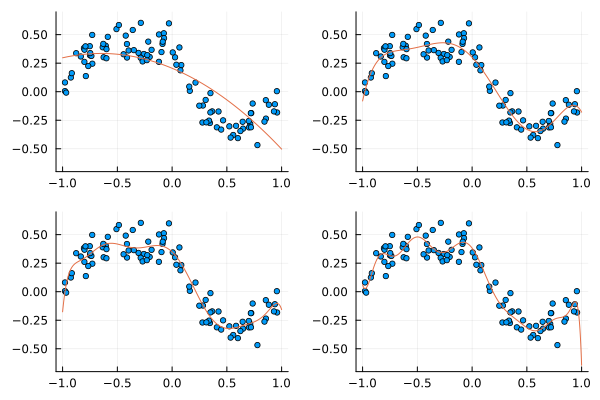

In [63]:
using Plots 
xseries = linspace(-1, 1, 1000)
p = plot(layout=4, legend=false, ylim=(-0.7,0.7))
scatter!(x, y, subplot=1, markersize = 3)
plot!(xseries, predict(theta2, xseries), subplot=1)
scatter!(x, y, subplot=2, markersize = 3)
plot!(xseries, predict(theta6, xseries), subplot=2)
scatter!(x, y, subplot=3, markersize = 3)
plot!(xseries, predict(theta10, xseries), subplot=3)
scatter!(x, y, subplot=4, markersize = 3)
plot!(xseries, predict(theta15, xseries), subplot=4)

# Polynomial approximation

**Train data set:**

- $ x^{(i)} \sim Unif(-1, 1),i=1,2,...,N = 100$ 
- $ y^{(i)} = {x^{(i)}}^3 - x + \frac{0.4}{1+25{x^(i)}^3} + N(0, 0.1)$

**Test set**

- 100 randomly chosen points generated by the same method as used for the training set
  

In [27]:
function generate_data(N=100)
    x = 2 * rand(N, 1) .- 1
    y = x.^3 - x + 0.4 ./ (1 .+ 25*x.^2) + 0.1*randn(N, 1)
    return x, y
end

generate_data (generic function with 2 methods)

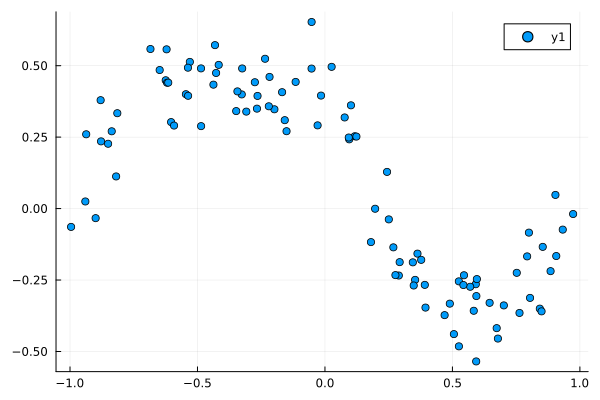

In [42]:
using Plots
# Generate the train set 
x, y = generate_data(100)
scatter(x, y)

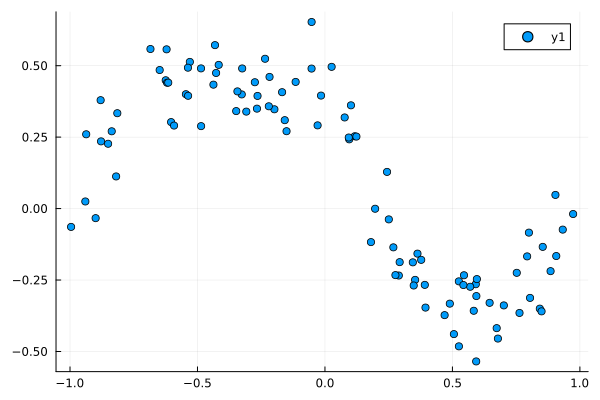

In [52]:
# Generate the test set 
x_test, y_test = generate_data(100)
scatter(x, y)

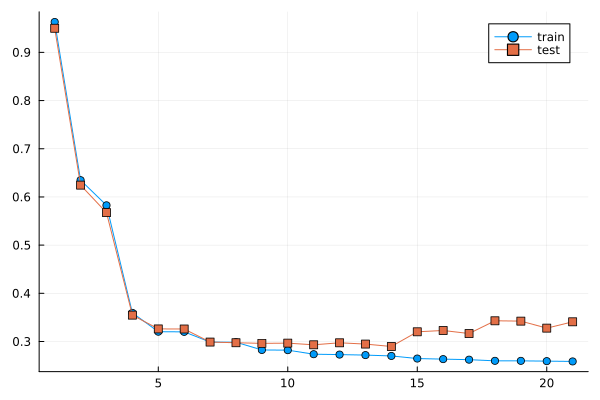

In [58]:
# Use the training data to build the models
# Build 21 polynomial equations
using VMLS
using LinearAlgebra
function build_model(x, y, p)
    A = vandermonde(x,p)
    theta = A \ y 
    return A, theta 
end

train_error = zeros(21)
test_error = zeros(21)

for p=1:21 
    A, theta = build_model(x, y, p)
    yhat = A * theta  
    train_error[p] = norm(yhat - y)/norm(y)
    
    y_test_hat = vandermonde(x_test, p) * theta 
    test_error[p] = norm(y_test_hat - y_test) / norm(y_test)
end

plot(1:21, train_error, marker = :circle, label = "train")
plot!(1:21, test_error, marker = :square, label = "test")